### Regresión Logística

El clasificador de regresión logística se utiliza para probleams biclase y en donde las clases son línealmente separables. Sus prestaciones se pueden extener a probelasm multiclase a través de la técnica *one vs rest* u OvR. Este clasificador parte de la probabilidad a favor de un determinado evento, definida por la *razón de momios* u *Odds Ratio*.

$$OR = \frac{p}{1-p},$$

donde $p$ es la probabilidad del evento.

Al OR le podemos calcular el logaritmo para obtener la función **logit**,

$$logit(p)=\log\frac{p}{1-p}$$

En términos de los parámetros de entrada de nuestro clasificador tendremos:

$$logit(p)=logit(P(y=1|\mathbf{x}))=w_0x_0+w_1x_1+\ldots+w_{1-p}x_{1-p}=\sum{i=0}^{1-p}w_ix_i=\mathbf{w}^{\top}\mathbf{x}=z$$

Lo que queremos hacer es despejar la probabilida del evento, que se va a realicacionar con la probabilidad de que una obseravación pertenezca a la clase con etiqueta $y=1$. Para ello utilizamos la función inversa, que se denomina **sigmoide**.

$$\phi(z)=\frac{1}{1+e^{-z}}$$

Gráficamente tendremos:

In [20]:
import matplotlib.pyplot as plt #Librería para gráficar
import numpy as np #Librería numérica

#Definimos la función sigmoidea
def sigmoide(z):
    funcion_sigmoide = 1.0/(1.0+np.exp(-z))
    return funcion_sigmoide

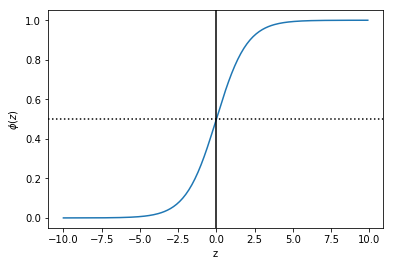

In [19]:
#Para probarla necesitamos un vector de entrada que es z
z = np.mgrid[-10:10:0.1] #Declaramos un arreglo tipo mesh grid
fi = sigmoide(z)

#Para la gráfica
plt.plot(z,fi)
plt.axvline(0,0,color='k') #Trazamos una linea vertica por (0,0) de color negro
plt.axhline(y=0.5, ls='dotted',color='k') #Linea horizontal por y=0.5 punteada y de color negro
plt.ylabel('$\phi(z)$')
plt.xlabel('z')
plt.show()

# Base de datos (Iris)

La base de datos ris es muy itilizada para probar los algoritmos de ML. Consiste en 150 observaciones y 3 clases (50 observaciones por clase). Las tres clases son: *Iris Setosa*, *Iris Versicolor*, *Iris Virginica*. Cada observación tiene 4 características: largo y ancho del sépalo y el largo y ancho del pétalo.

![Iris](http://i.imgur.com/BIsc18z.jpg)

In [21]:
#Para cargar la base de datos
from sklearn import datasets 
iris = datasets.load_iris() #Se carga la base de datos
X = iris.data[:,[2,3]] #La matriz de datos (Solo se toman dos caracteristicas para visualizar)
y = iris.target #Las etiquetas
print(np.unique(y))

[0 1 2]


In [23]:
from sklearn.linear_model import LogisticRegression #Importa el modelo de clasificación
from sklearn.cross_validation import train_test_split #Importa las funciones de validación cruzada
from sklearn.preprocessing import StandardScaler #Importa las funciones de preprocesamineto

#Hacemos la división del conjunto de entrenamiento y el conjunto de validación

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

sc = StandardScaler()
sc.fit(X_train)
X_train_norm = sc.transform(X_train)
X_test_norm = sc.transform(X_test)

#Ahora entrenamos el clasificador
clasificador = LogisticRegression(C=1000.0, random_state=0) #C es el parámetro de regularización
clasificador.fit(X_train_norm, y_train) #Entrenamiento del clasificador

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [24]:
#Para validar el clasificador
y_pred = clasificador.predict(X_test_norm)
print('Las muestras mal clasificadas fueron %d' %(y_test != y_pred).sum())

Las muestras mal clasificadas fueron 1
